# Description

TODO

# Modules loading

In [1]:
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from clustermatch import conf

# Settings

In [2]:
DATASET_CONFIG = conf.GTEX

In [3]:
# ENRICH_FUNCTION = "enrichGO"

In [4]:
# CORRELATION_METHOD_NAME = "clustermatch"

In [5]:
# GENE_SELECTION_STRATEGY = "var_pc_log2"

In [6]:
# # clusterProfiler settings
# ENRICH_FUNCTION = "enrichGO"
# SIMPLIFY_CUTOFF = 0.7
# GO_ONTOLOGIES = ("BP", "CC", "MF")

In [7]:
# SIMILARITY_MATRICES_DIR = DATASET_CONFIG["SIMILARITY_MATRICES_DIR"]
# display(SIMILARITY_MATRICES_DIR)

In [8]:
# SIMILARITY_MATRIX_FILENAME_TEMPLATE = DATASET_CONFIG["SIMILARITY_MATRIX_FILENAME_TEMPLATE"]
# display(SIMILARITY_MATRIX_FILENAME_TEMPLATE)

# Paths

In [9]:
INPUT_FILE = DATASET_CONFIG["GENE_ENRICHMENT_COMBINED_FILE"]
display(INPUT_FILE)
assert INPUT_FILE.exists()

PosixPath('/home/miltondp/projects/labs/greenelab/clustermatch_repos/clustermatch-gene-expr/base/results/gtex_v8/gene_set_enrichment/gtex_v8_data-gene_set_enrichment.pkl')

# Load data

In [10]:
df = pd.read_pickle(INPUT_FILE)

In [11]:
df.shape

(84471, 20)

In [12]:
df.columns

Index(['n_clusters', 'cluster_id', 'term_id', 'term_desc', 'gene_count',
       'gene_total', 'gene_ratio', 'bg_count', 'bg_total', 'bg_ratio',
       'pvalue', 'pvalue_adjust', 'rich_factor', 'fold_enrich', 'tissue',
       'gene_sel_strategy', 'corr_method', 'clust_method', 'enrich_func',
       'enrich_params'],
      dtype='object')

In [13]:
with pd.option_context(
    "display.max_rows", None, "display.max_columns", None, "display.max_colwidth", None
):
    tmp = df.head()
    display(tmp)

,n_clusters,cluster_id,term_id,term_desc,gene_count,gene_total,gene_ratio,bg_count,bg_total,bg_ratio,pvalue,pvalue_adjust,rich_factor,fold_enrich,tissue,gene_sel_strategy,corr_method,clust_method,enrich_func,enrich_params
0,2,C0,hsa04380,Osteoclast differentiation,27,248,0.108871,51,1774,0.028749,2.376904e-11,5.229189e-09,0.529412,3.787002,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering,enrichKEGG,hsa
1,2,C0,hsa04613,Neutrophil extracellular trap formation,25,248,0.100806,50,1774,0.028185,6.975013e-10,7.672515e-08,0.500000,3.576613,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering,enrichKEGG,hsa
2,2,C0,hsa04662,B cell receptor signaling pathway,18,248,0.072581,29,1774,0.016347,1.939872e-09,1.422573e-07,0.620690,4.439933,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering,enrichKEGG,hsa
3,2,C0,hsa05152,Tuberculosis,25,248,0.100806,58,1774,0.032694,3.349306e-08,1.842118e-06,0.431034,3.083287,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering,enrichKEGG,hsa
4,2,C0,hsa04972,Pancreatic secretion,19,248,0.076613,41,1774,0.023112,4.180927e-07,1.839608e-05,0.463415,3.314910,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering,enrichKEGG,hsa


# QQ plot

In [145]:
CLUSTERMATCH_METHOD = "clustermatch_k2"
# CLUSTERMATCH_METHOD = "clustermatch"

In [146]:
PERFORMANCE_MEASURE = "pvalue_adjust"
# PERFORMANCE_MEASURE = "rich_factor"
# PERFORMANCE_MEASURE = "fold_enrich"

In [147]:
QUANTILES = np.linspace(0, 1, 10000)
display(QUANTILES[:10])
display(QUANTILES[-10:])

array([0.        , 0.00010001, 0.00020002, 0.00030003, 0.00040004,
       0.00050005, 0.00060006, 0.00070007, 0.00080008, 0.00090009])

array([0.99909991, 0.99919992, 0.99929993, 0.99939994, 0.99949995,
       0.99959996, 0.99969997, 0.99979998, 0.99989999, 1.        ])

In [148]:
df["enrich_params"].unique()

['hsa']
Categories (1, object): ['hsa']

In [149]:
df_subset = df[
    (np.ones(df.shape[0]).astype(bool))
    & (df.pvalue_adjust < 0.05)  # only significant results
    #     & (df.tissue == "adipose_subcutaneous")
    & (df.gene_sel_strategy == "var_pc_log2")
    & (df.clust_method == "SpectralClustering")
    & (df.enrich_func == "enrichKEGG")
#     & (df.enrich_params.str.contains("_full"))
]

In [150]:
assert df_subset["pvalue_adjust"].max() < 0.05

In [151]:
df_subset.shape

(84471, 20)

In [152]:
df_subset.head()

,n_clusters,cluster_id,term_id,term_desc,gene_count,gene_total,gene_ratio,bg_count,bg_total,bg_ratio,pvalue,pvalue_adjust,rich_factor,fold_enrich,tissue,gene_sel_strategy,corr_method,clust_method,enrich_func,enrich_params
0,2,C0,hsa04380,Osteoclast differentiation,27,248,0.108871,51,1774,0.028749,2.376904e-11,5.229189e-09,0.529412,3.787002,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering,enrichKEGG,hsa
1,2,C0,hsa04613,Neutrophil extracellular trap formation,25,248,0.100806,50,1774,0.028185,6.975013e-10,7.672515e-08,0.500000,3.576613,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering,enrichKEGG,hsa
2,2,C0,hsa04662,B cell receptor signaling pathway,18,248,0.072581,29,1774,0.016347,1.939872e-09,1.422573e-07,0.620690,4.439933,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering,enrichKEGG,hsa
3,2,C0,hsa05152,Tuberculosis,25,248,0.100806,58,1774,0.032694,3.349306e-08,1.842118e-06,0.431034,3.083287,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering,enrichKEGG,hsa
4,2,C0,hsa04972,Pancreatic secretion,19,248,0.076613,41,1774,0.023112,4.180927e-07,1.839608e-05,0.463415,3.314910,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering,enrichKEGG,hsa


In [153]:
df_methods = df_subset["corr_method"].unique()
display(df_methods)

['clustermatch', 'clustermatch_k2', 'pearson_abs', 'spearman_abs']
Categories (4, object): ['clustermatch', 'clustermatch_k2', 'pearson_abs', 'spearman_abs']

In [154]:
results_per_method = {}

for m in df_methods:
    df_values = df_subset[df_subset.corr_method == m][PERFORMANCE_MEASURE]
    display(f"{m} - {df_values.shape[0]}")

    if PERFORMANCE_MEASURE == "pvalue_adjust":
        df_values = -np.log10(df_values)

    results_per_method[m] = df_values.quantile(QUANTILES).to_numpy()

'clustermatch - 21264'

'clustermatch_k2 - 17980'

'pearson_abs - 24117'

'spearman_abs - 21110'

In [155]:
quantiles_df = pd.DataFrame(results_per_method)

In [156]:
quantiles_df.shape

(10000, 4)

In [157]:
quantiles_df.head()

,clustermatch,clustermatch_k2,pearson_abs,spearman_abs
0,1.301106,1.301247,1.301092,1.301247
1,1.301306,1.301306,1.301159,1.301306
2,1.301306,1.301306,1.301306,1.301306
3,1.301306,1.301431,1.301306,1.301306
4,1.301306,1.302114,1.301954,1.301306


In [158]:
quantiles_df.tail()

,clustermatch,clustermatch_k2,pearson_abs,spearman_abs
9995,40.541479,42.237956,32.408073,32.947575
9996,41.499252,42.454071,34.352475,33.087955
9997,42.275761,43.445205,35.076274,35.229129
9998,43.445205,43.445205,43.566673,37.388189
9999,43.445205,47.409032,56.627442,44.656563


In [159]:
quantiles_df.describe()

,clustermatch,clustermatch_k2,pearson_abs,spearman_abs
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.471792,3.081553,3.349616,3.383197
std,3.436233,3.073310,3.061549,3.197146
min,1.301106,1.301247,1.301092,1.301247
25%,1.544344,1.484574,1.612324,1.528479
50%,2.190138,1.917410,2.242515,2.110971
75%,3.675507,3.131334,3.799357,3.660866
max,43.445205,47.409032,56.627442,44.656563


In [160]:
# fig, ax = plt.subplots(figsize=(10, 8))

# sns.scatterplot(
#     data=quantiles_df,
#     x="pearson_full",
#     y=CLUSTERMATCH_METHOD,
#     label="vs Pearson (full)",
#     ax=ax,
# )

# sns.scatterplot(
#     data=quantiles_df,
#     x="spearman_full",
#     y=CLUSTERMATCH_METHOD,
#     label="vs Spearman (full)",
#     ax=ax,
# )

# ax.set_xlabel(None)
# # ax.set_ylabel(None)

# min_val = min((quantiles_df.iloc[:, 0].min(), quantiles_df.iloc[:, 1].min()))
# max_val = max((quantiles_df.iloc[:, 0].max(), quantiles_df.iloc[:, 1].max()))
# ax.plot([min_val, max_val], [min_val, max_val], "k", linewidth=0.5)

# ax.set_title(f"KEGG ({PERFORMANCE_MEASURE})")

Text(0.5, 1.0, 'KEGG (pvalue_adjust)')

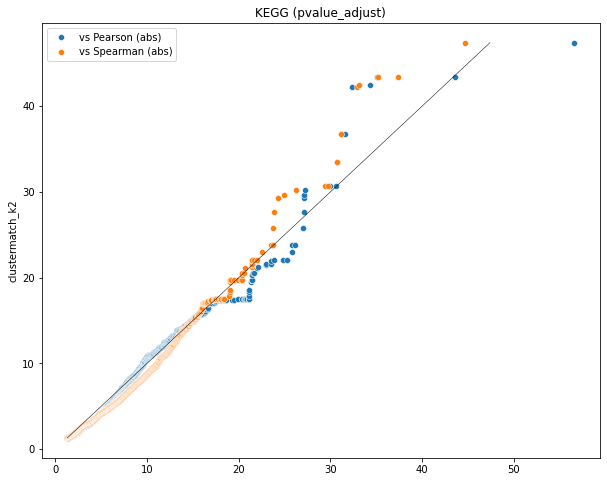

In [161]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(
    data=quantiles_df,
    x="pearson_abs",
    y=CLUSTERMATCH_METHOD,
    label="vs Pearson (abs)",
    ax=ax,
)

sns.scatterplot(
    data=quantiles_df,
    x="spearman_abs",
    y=CLUSTERMATCH_METHOD,
    label="vs Spearman (abs)",
    ax=ax,
)

ax.set_xlabel(None)
# ax.set_ylabel(None)

min_val = min((quantiles_df.iloc[:, 0].min(), quantiles_df.iloc[:, 1].min()))
max_val = max((quantiles_df.iloc[:, 0].max(), quantiles_df.iloc[:, 1].max()))
ax.plot([min_val, max_val], [min_val, max_val], "k", linewidth=0.5)

ax.set_title(f"KEGG ({PERFORMANCE_MEASURE})")

**UPDATE**

Clustermatch (multi pattern) outperforms pearson (linear and abs), although pearson find most significant associations towards the
right end of the distribution.

However, Clustermatch does not outperform spearman (monotonic and abs), which provides more significant results across the entire distribution.